In [1]:
import meep as mp
import meep.adjoint as mpa
from meep import Animate2D
import numpy as np
from autograd import numpy as npa
from autograd import tensor_jacobian_product, grad
import nlopt
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from meep.materials import Ag
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
import matplotlib.colors as mcolors

mp.verbosity(1)
TiO2 = mp.Medium(index=2.6)
SiO2 = mp.Medium(index=1.44)
Si = mp.Medium(index=3.4)
Air = mp.Medium(index=1)

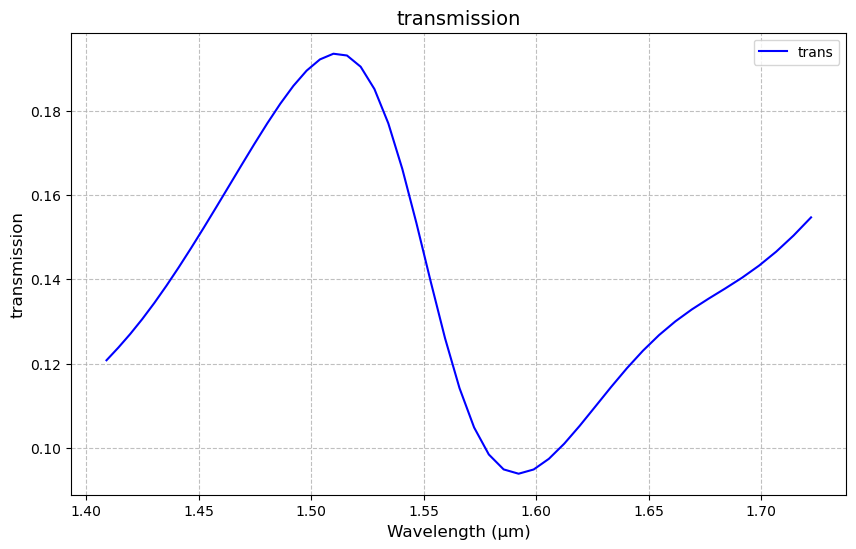

In [2]:
trans_freqs        = np.load('TRAN/trans_freqs.npy')
trans_wavelengths  = np.load('TRAN/trans_wavelengths.npy')
trans_empty_fluxes = np.load('TRAN/trans_empty_fluxes.npy')
trans_fluxes       = np.load('TRAN/trans_fluxes.npy')



transmission = np.array(trans_fluxes) / np.array(trans_empty_fluxes)
plt.figure(figsize=(10, 6))
plt.plot(trans_wavelengths, transmission, label='trans', color='blue')

plt.xlabel('Wavelength (µm)', fontsize=12)
plt.ylabel('transmission', fontsize=12)
plt.title('transmission', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()
plt.close()

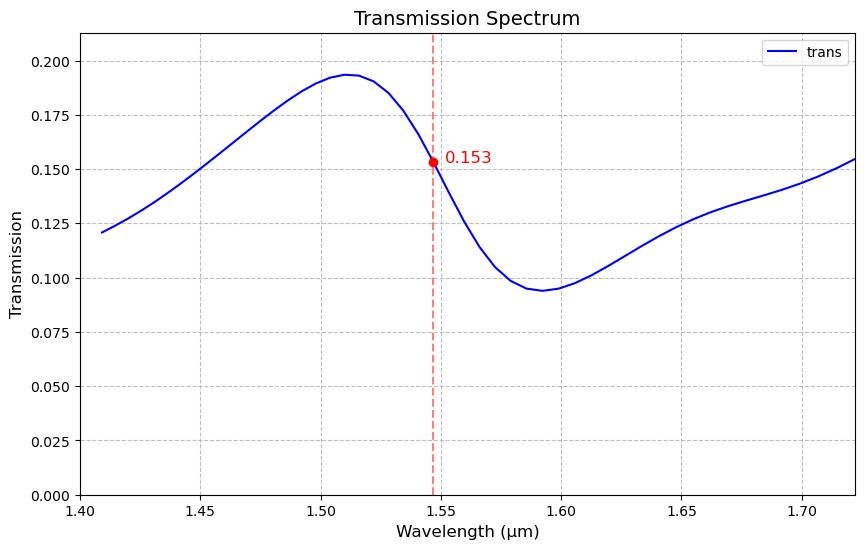

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 讀取資料
trans_freqs        = np.load('TRAN/trans_freqs.npy')
trans_wavelengths  = np.load('TRAN/trans_wavelengths.npy')
trans_empty_fluxes = np.load('TRAN/trans_empty_fluxes.npy')
trans_fluxes       = np.load('TRAN/trans_fluxes.npy')

# 計算穿透率
transmission = np.array(trans_fluxes) / np.array(trans_empty_fluxes)

# 找出最接近 1.55 μm 的點
target_wavelength = 1.55
idx_155 = np.argmin(np.abs(trans_wavelengths - target_wavelength))
w_155 = trans_wavelengths[idx_155]
t_155 = transmission[idx_155]

# 繪圖
plt.figure(figsize=(10, 6))
plt.plot(trans_wavelengths, transmission, label='trans', color='blue')

# 加上標記點與說明
plt.plot(w_155, t_155, 'ro')  # 紅色點標示
plt.text(w_155 + 0.005, t_155, f'{t_155:.3f}', color='red', fontsize=12)  # 顯示數值
plt.axvline(x=w_155, color='red', linestyle='--', alpha=0.5)  # 垂直虛線

# 標籤與格式
plt.xlabel('Wavelength (µm)', fontsize=12)
plt.ylabel('Transmission', fontsize=12)
plt.title('Transmission Spectrum', fontsize=14)
plt.xlim(1.4, np.max(trans_wavelengths))
plt.ylim(0, 1.1*np.max(transmission))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()
plt.close()
